# Time-Frequency Representation

Compute and visualize a Morlet wavelet time-frequency representation
of an EGG signal using `morlet_tfr` and `plot_tfr`. This is useful for
examining how spectral power evolves over the recording.

The TFR performs its own frequency decomposition, so it should be
applied directly to the raw EGG signal (no bandpass filtering needed).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import gastropy as gp

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

## Load EGG Data

Load the sample recording and select the best channel.

In [2]:
# Load sample EGG data
egg = gp.load_egg()
signal = egg['signal']
sfreq = egg['sfreq']
ch_names = list(egg['ch_names'])

# Select best channel
best_idx, peak_freq, _, _ = gp.select_best_channel(signal, sfreq)
raw = signal[best_idx]
times = np.arange(len(raw)) / sfreq

print(f"Best channel: {ch_names[best_idx]}, peak: {peak_freq * 60:.1f} cpm")
print(f"Recording duration: {times[-1]:.0f} s")

Best channel: EGG6, peak: 3.2 cpm
Recording duration: 758 s


### Raw Signal

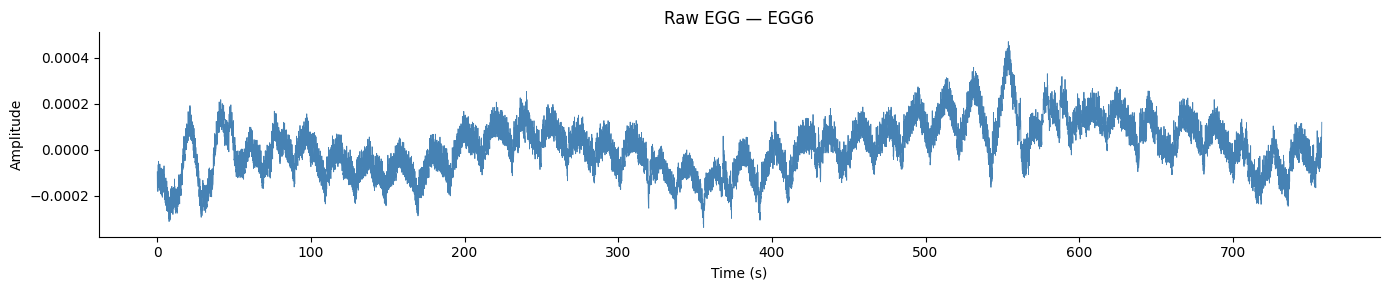

In [3]:
fig, ax = plt.subplots(figsize=(14, 3))
ax.plot(times, raw - np.mean(raw), color='steelblue', linewidth=0.6)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title(f'Raw EGG — {ch_names[best_idx]}')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
plt.show()

## Basic TFR

Compute the Morlet wavelet TFR across the gastric frequency range
(0.02--0.1 Hz, i.e. 1--6 cpm). The function mean-centers and
reflect-pads the signal internally to avoid edge artifacts.

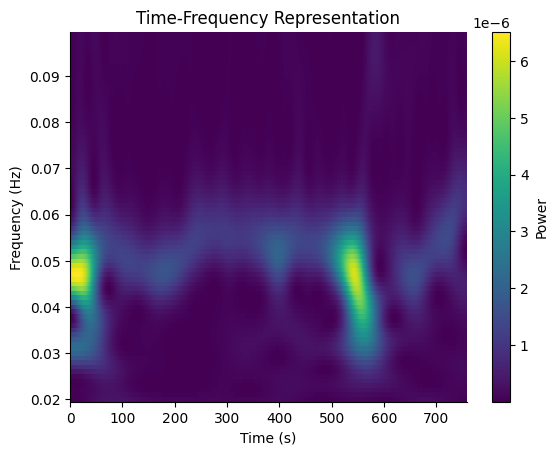

In [4]:
freqs = np.arange(0.02, 0.1, 0.001)
freqs_out, tfr_times, power = gp.morlet_tfr(raw, sfreq=sfreq, freqs=freqs)

fig, ax = gp.plot_tfr(freqs_out, tfr_times, power)
plt.show()

## With Normogastric Band Overlay

Pass a `GastricBand` to draw the band boundaries on the plot.

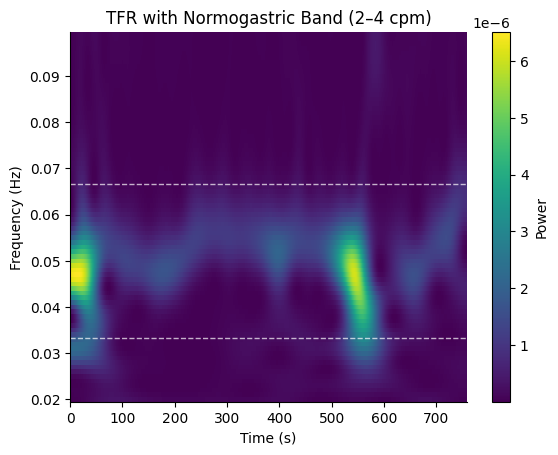

In [5]:
fig, ax = gp.plot_tfr(freqs_out, tfr_times, power, band=gp.NORMOGASTRIA)
ax.set_title("TFR with Normogastric Band (2\u20134 cpm)")
plt.show()

## Adjusting Time-Frequency Resolution

The `n_cycles` parameter controls the trade-off between time and
frequency resolution. Fewer cycles give better time resolution;
more cycles give better frequency resolution.

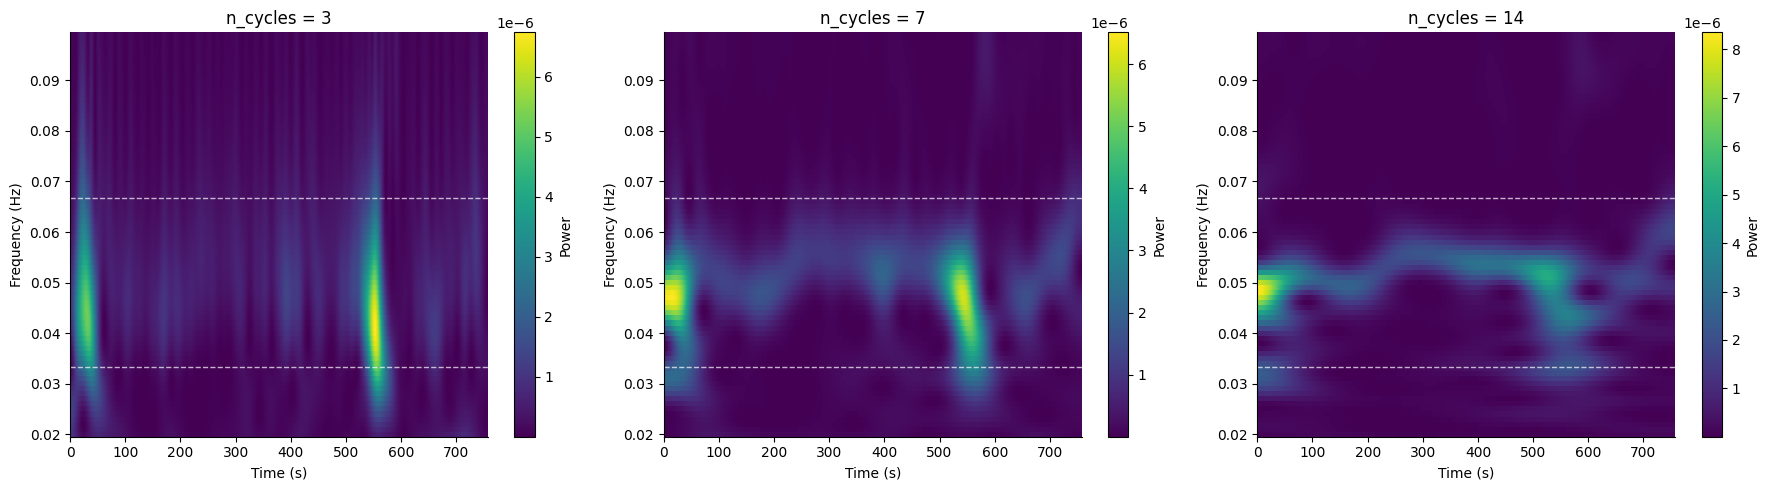

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, nc in zip(axes, [3, 7, 14], strict=True):
    _, _, pwr = gp.morlet_tfr(raw, sfreq=sfreq, freqs=freqs, n_cycles=nc)
    gp.plot_tfr(freqs, tfr_times, pwr, band=gp.NORMOGASTRIA, ax=ax)
    ax.set_title(f'n_cycles = {nc}')

fig.tight_layout()
plt.show()

## Custom Colormap and Color Limits

Use `cmap`, `vmin`, and `vmax` to customize the appearance.

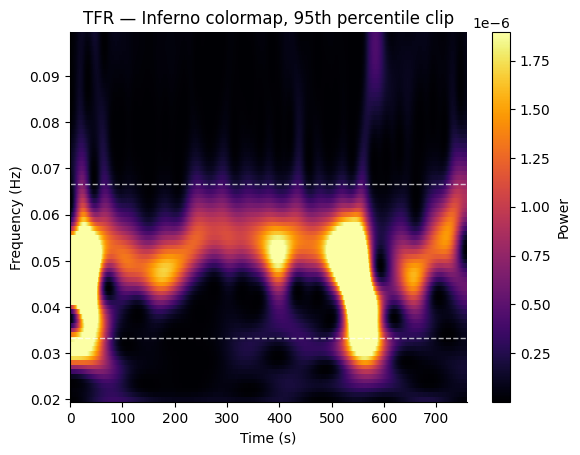

In [7]:
fig, ax = gp.plot_tfr(
    freqs_out, tfr_times, power,
    band=gp.NORMOGASTRIA,
    cmap="inferno",
    vmax=np.percentile(power, 95),
)
ax.set_title("TFR — Inferno colormap, 95th percentile clip")
plt.show()

**See also:** [Multiband Analysis](multiband_analysis.ipynb),
[PSD Parameters](psd_parameters.ipynb),
[EGG Processing Tutorial](../tutorials/egg_processing.ipynb)